In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.19.0'

In [4]:
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 72s 0us/step


In [5]:
print("X Train: {} \nX Test: {} \ny Train: {} \ny test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (50000, 32, 32, 3) 
X Test: (10000, 32, 32, 3) 
y Train: (50000, 1) 
y test: (10000, 1)


In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [8]:
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size = 32
)

In [9]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [10]:
test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size = 32
)

In [11]:
cnn = Sequential()

In [12]:
cnn.add(Input(shape=(32, 32, 3)))

In [13]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"))

In [14]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

In [15]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"))

In [16]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

In [17]:
cnn.add(Flatten())

In [18]:
cnn.add(Dense(units=128, activation="relu"))

In [19]:
cnn.add(Dense(units=64, activation="relu"))

In [20]:
cnn.add(Dense(units=10, activation="softmax"))

In [21]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall", "f1_score"])

In [22]:
history = cnn.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

C:\Users\PRATYUSH BAJPEYEE\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 324s 195ms/step - accuracy: 0.3636 - f1_score: 0.3529 - loss: 1.7286 - precision: 0.6194 - recall: 0.1333 - val_accuracy: 0.5541 - val_f1_score: 0.5334 - val_loss: 1.2217 - val_precision: 0.7039 - val_recall: 0.4112
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 306s 195ms/step - accuracy: 0.5725 - f1_score: 0.5698 - loss: 1.1964 - precision: 0.7373 - recall: 0.4121 - val_accuracy: 0.6368 - val_f1_score: 0.6320 - val_loss: 1.0561 - val_precision: 0.7696 - val_recall: 0.4966
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 165ms/step - accuracy: 0.6262 - f1_score: 0.6238 - loss: 1.0629 - precision: 0.7593 - recall: 0.4913 - val_accuracy: 0.6544 - val_f1_score: 0.6451 - val_loss: 0.9906 - val_precision: 0.7576 - val_recall: 0.5556
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 157ms/step - accuracy: 0.6638 - f1_score: 0.6615 - loss: 0.9629 - precision: 0.7827 - recall: 0.5473 - val_accuracy: 0.6822 - val_f1_score: 0.6747 - val_loss: 0.9349 - val_precisi

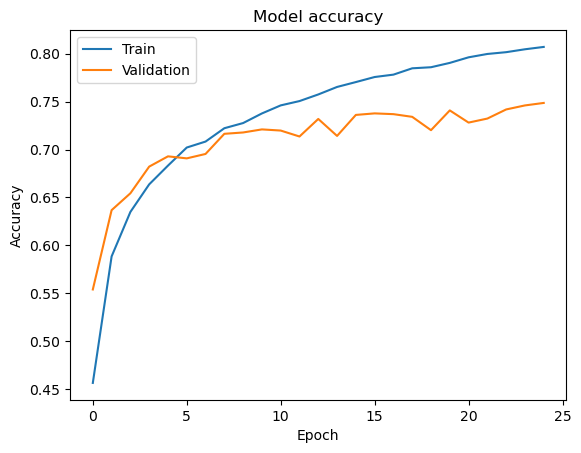

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()